# Section X: Using the ACT likelihood 

In this section we will use the pyactlike package to calculate the likelihood of a sample spectrum given the ACT data.   This package is available on [GitHub](https://github.com/ACTCollaboration/pyactlike/blob/master/notebooks/Basic%20Example.ipynb) and was developed for Aiola et al. 2020, Choi et al. 2020. This package is based off of the Fortran implementation written by Erminia Calabrese and Jo Dunkley. 

To return to the main notebook or to view a different section use the links in the table of contents.

## Table of contents

 --- 
> [Section 1](Section_1_Introduction.ipynb): Introduction to AdvACT Data Release 4

> [Section 2](Section_2_coadded_maps.ipynb): S08-18 Coadded maps and an Introduction to Pixell

> [Section 3](Section_3_HEALPix_CAR_Conversions.ipynb):  Demonstration of methods to convert maps between HEALPix format and the CAR format.

> [Section 4](Section_4_visualize_objects.ipynb):  Guide to using Pixell to look at objects in the maps and stacking our maps on catalogue positions.

> [Section 5](Section_5_Lensing_maps.ipynb):  Introduction to the Lensing maps.

> [Section 6](Section_6_delensing_param_shifts):  Delensing the CMB powerspectrum and comparing the delensed and lensed parameters

> [Section 7](Section_7_Component_separated_maps.ipynb):  Guide to the use of the Component Separated maps.

> [Section 8](Section_8_individual_maps_and_harmonic_analysis): Maps of Individual Patches and Harmonic Analysis using CAR maps

> [Section 9](Section_9_E_B_maps.ipynb):  Look at how to generate E and B maps from I, Q, U maps. 
 
---

We begin by importing the neccessary packages, in particular the pyactlike package discussed above.

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np
import pyactlike



### Step 1: read in some included example spectra and plot them

(0, 3000)

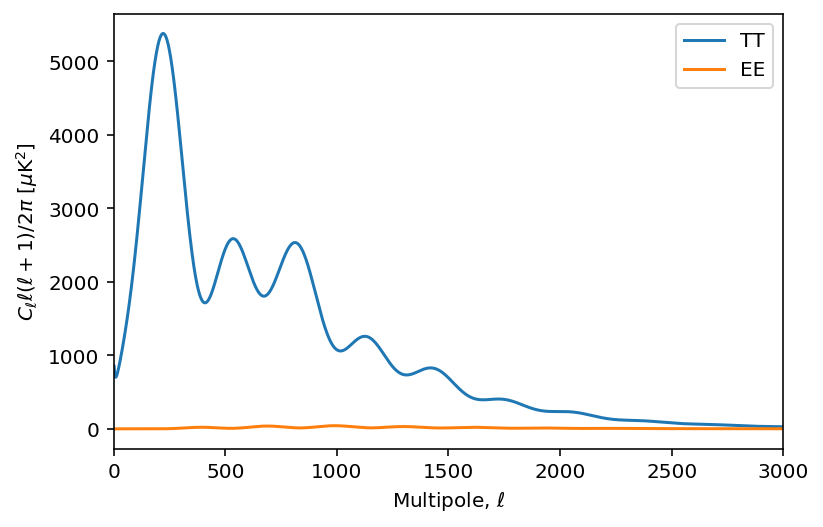

In [3]:
like = pyactlike.ACTPowerSpectrumData()

# Read an example spectrum from disk.
filename = like.data_dir + "bf_ACTPol_Feb24.minimum.theory_cl"

tt_lmax = 6000
ell, dell_tt, dell_te, dell_ee = np.genfromtxt(
    filename,
    delimiter=None,
    unpack=True,
    max_rows=tt_lmax - 1,
    usecols=(0, 1, 2, 3),
)

plt.plot(ell, dell_tt, "-", label="TT")
plt.plot(ell, dell_ee, "-", label="EE")
plt.xlabel(r"Multipole, $\ell$")
plt.ylabel(r"$C_{\ell} \ell (\ell+1) / 2 \pi$ $[\mu$K$^2]$")
plt.legend()
plt.xlim(0,3000)



### Step 2: Compute the likelihood of the spectrum given the ACT data

In this step we also compare to the expected $\chi^2$ value and note that they match up as expected.

In [4]:
# compute the likelihood
like = pyactlike.ACTPowerSpectrumData()
chi2 = -2 * like.loglike(dell_tt, dell_te, dell_ee, 1.0)
print("ACTPol chi2 = " + "{0:.12f}".format(chi2))
print("Expected:     281.216204088279")

ACTPol chi2 = 281.216204088275
Expected:     281.216204088279
